<a href="https://colab.research.google.com/github/RiyaAgrawalRocks/Emotion-Mining-in-YT-Discussions/blob/main/Sentiment_Analysis_On_YT_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Import necessary libraries
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
# Step 1: Load the dataset (already cleaned it)
df = pd.read_csv('YoutubeCommentsDataSet.csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'YoutubeCommentsDataSet.csv'

In [ ]:
df = df.dropna(subset=['Comment'])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving YoutubeCommentsDataSet.csv to YoutubeCommentsDataSet (1).csv


In [ ]:
# Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
print(df.columns)

Index(['comment', 'sentiment'], dtype='object')


In [ ]:
# Replace 'neg' with 0, 'pos' with 1, and 'nue' with 2
df['sentiment'] = df['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})

df.head()

<ipython-input-32-32ecfc6ec5bc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})


,comment,sentiment
0,lets not forget that apple pay in 2014 require...,1
1,here in nz 50 of retailers don’t even have con...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn’t take app...,0
4,apple pay is so convenient secure and easy to ...,2


In [ ]:
 # Clean Text (Remove Special Characters, Links, etc.)

def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text.strip()
# Example usage
df['comment'] = df['comment'].apply(clean_text)
df.head()

,comment,sentiment
0,lets not forget that apple pay in required a ...,1
1,here in nz of retailers dont even have contac...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesnt take appl...,0
4,apple pay is so convenient secure and easy to ...,2


In [ ]:
import nltk   #natural lang toolkit. python natural lang toolkit
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Example usage
df['comment'] = df['comment'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: name 'df' is not defined

In [ ]:
# Step 2: Split the data into features (X) and target (y)
X = df['comment']
y = df['sentiment']

In [ ]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Convert text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Step 5: Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=4000),

    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1000), # You can change n_neighbors as needed

    "Naive Bayes": MultinomialNB(alpha=1),


}

In [ ]:
# Step 6: Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)

    # Predict the sentiments for the test set
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    print(f"Accuracy Score for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy Score for Logistic Regression: 0.7478900081677103
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.26      0.37       441
           1       0.63      0.54      0.58       912
           2       0.79      0.92      0.85      2320

    accuracy                           0.75      3673
   macro avg       0.69      0.58      0.60      3673
weighted avg       0.73      0.75      0.73      3673


Training K-Nearest Neighbors...
Accuracy Score for K-Nearest Neighbors: 0.6523277974407841
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.69      0.14      0.23       912
           2       0.65      0.98      0.78      2320

    accuracy                           0.65      3673
   macro avg       0.45      0.37      0.34      3673
weighted avg       0.58      0.65      0.55     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Step 1: Vectorize your text data
# You can choose either CountVectorizer or TfidfVectorizer
vectorizer = TfidfVectorizer()  # TF-IDF often works better for text classification

# Transform the text data
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

best_model = None
best_accuracy = 0
best_model_name = ""
results = {}

print("\nModel Performance Summary:\n" + "-"*30)
for name, model in models.items():
    # Use the vectorized features instead of raw text
    model.fit(X_train_features, y_train)
    y_pred = model.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name}: Accuracy = {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Display best model
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.4f}")


Model Performance Summary:
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression: Accuracy = 0.7473
K-Nearest Neighbors: Accuracy = 0.6474
Naive Bayes: Accuracy = 0.6613

Best Model:
Logistic Regression with Accuracy: 0.7473


<ipython-input-41-a935a41028f0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="coolwarm")


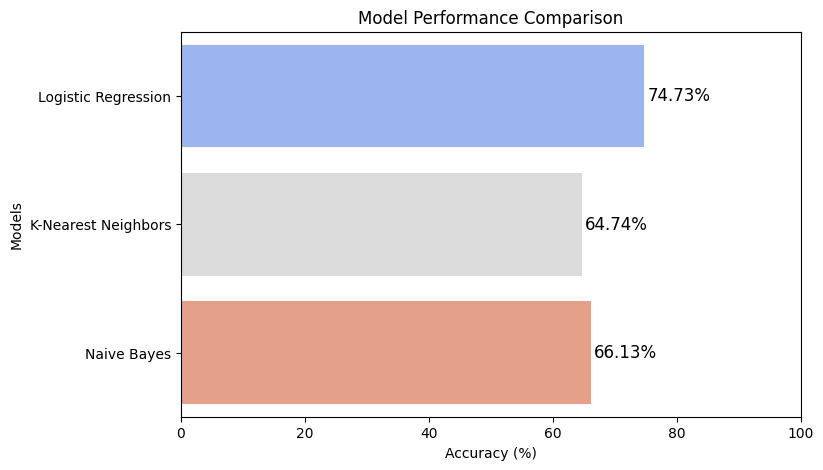

In [ ]:
model_names = list(results.keys())
accuracies = [acc * 100 for acc in results.values()]

plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette="coolwarm")

for index, value in enumerate(accuracies):
    plt.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=12)-

plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Model Performance Comparison")
plt.xlim(0, 100)
plt.show()

In [ ]:

# Function to predict sentiment
def predict_sentiment(text):
    # Vectorize the input text
    text_features = vectorizer.transform([text])

    # Predict using the best trained model
    prediction = best_model.predict(text_features)[0]

    # Map numerical label back to sentiment
    label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    sentiment = label_map.get(prediction, "Unknown")

    return sentiment

# Interactive loop for predictioins
while True:
    user_input = input("Enter a text (or type 'exit' to stop): ")
    if user_input.lower() == 'exit':
        break

    sentiment = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {sentiment}\n")


Enter a text (or type 'exit' to stop): sensible
Predicted Sentiment: neutral

Enter a text (or type 'exit' to stop): video is bad 
Predicted Sentiment: negative

Enter a text (or type 'exit' to stop): I liked the content very much
Predicted Sentiment: positive

Enter a text (or type 'exit' to stop): exit
